##### Họ và tên: Đặng Quốc Khánh
##### Mã sinh viên: B22DCCN444
##### Học phần: Thực tập cơ sở
##### Giảng viên: PGS.TS Trần Đình Quế

# TRIỂN KHAI CÁC MÔ HÌNH HỌC MÁY

## Phần 1: Tổng quan

Mục đích chính của học máy là tạo ra một mô hình có thể dùng để đưa ra các dự đoán. Mục đích cuối cùng mà chúng ta muốn là làm cho mô hình của mình trở nên dễ tiếp cận với người dùng để họ có thể sử dụng để làm những công việc hữu ích như đưa ra dự đoán ( ví dụ như giúp bác sĩ chẩn đoán,…).


Một cách tốt để triển khai mô hình học máy đó là xây dựng một REST API. Nhờ có REST API, những người không quen thuộc với học máy có thể truy cập vào mô hình của bạn. Dùng REST, bạn có thể xây dựng các ứng dụng giao diện người dùng đa nền tảng (như iOS, Android, Windows,…) và truyền dữ liệu đến mô hình để xử lý, sau đó kết quả có thể được trả về cho ứng dụng. Dưới đây là hình ảnh minh họa về xây dựng REST API để triển khai mô hình học máy.

![Mô hình REST API](https://i.imgur.com/SUrFSXS.png)


Mục tiêu của phần báo cáo này là thông qua một nghiên cứu ứng dụng lý thuyết để áp dụng vào thực tế (case study), xây dựng một mô hình học máy và triển khai nó dưới dạng một dịch vụ REST. Cuối cùng, chúng ta sẽ tạo một ứng dụng có giao diện người dùng bằng Python để cho phép người dùng thực hiện một số dự đoán.

## Phần 2: CASE STUDY

### 2.1 Đặt vấn đề


Trong nghiên cứu này, chúng ta sẽ đi giúp đỡ trong việc dự đoán một người có khả năng bị bệnh tiểu đường hay không dựa trên một số phép đo chẩn đoán của người đó. Bộ dữ liệu được sử dụng sẽ lấy từ cơ sở dữ liệu sau: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database. Bộ dữ liệu bao gồm nhiều dự đoán y tế độc lập với nhau và một mục tiêu (là bị hoặc không bị tiểu đường). Bộ dữ liệu gồm những đặc điểm mô tả sau:
+	Pregnancies: số lần mang thai.
+	Glucose: nồng độ glucose sau 2 giờ trong bài kiểm tra dung nạp glucose.
+	BloodPressure: Huyết áp tâm trương (đơn vị mm Hg).
+	SkinThickness: độ dày lớp da gập ở sau bắp tay.
+	Insulin: chỉ số insulin sau 2 giờ (mu U/ml).
+	BMI: chỉ số cơ thể (bằng cân nặng (kg) / chiều cao (m) bình phương).
+	DiabetesPedigreeFunction: hàm phả hệ (theo gia đình) bệnh tiểu đường.
+	Age: Tuổi.
+	Outcome: 0 (không bị tiểu đường) hoặc 1 (có bị tiểu đường).


Bộ dữ liệu có 768 bản ghi, và tất cả bệnh nhân đều là nữ, ít nhất 21 tuổi và là 	người Pima Ấn Độ.

### 2.2 Tải dữ liệu

Bộ dữ liệu được tải xuống cục bộ (nằm trong máy) và đặt tên là diabetes.csv. Đoạn code sau đây tải dữ liệu và in thông tin về khung dữ liệu dùng hàm info():

#### Code và output

In [24]:

# import thư viện
import numpy as np
import pandas as pd

# đọc file csv ghi ra biến df
df = pd.read_csv('diabetes.csv')

# in ra thông tin của df
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Giải thích kết quả:
+	<class 'pandas.core.frame.DataFrame'> : thông báo rằng dữ liệu được lưu là một DataFrame thuộc thư viện pandas.
+	RangeIndex: 768 entries, 0 to 767: số dòng dữ liệu, có 768 dòng (đúng với 768 bản ghi như đã nói ở trên), đánh số từ 0 đến 767.
+	Data columns (total 9 columns): số cột dữ liệu, tổng cộng 9 cột:
+	Bảng thông tin:
    -	Gồm 4 cột lần lượt là số thứ tự (#), tên cột của file csv (Column) , số lượng giá trị không phải null ứng với mỗi cột (Non-Null Count) và kiểu dữ liệu ứng với cột đó (Dtype).
    -	Gồm 9 hàng chứa từng thông tin cho các cột.
+	dtypes: float64(2), int64(7): kiểu dữ liệu gồm 2 loại: float64 là số thực 64 bit, có 2 cột dùng kiểu dữ liệu này và int64 là số nguyên 64 bit, có 7 cột dùng kiểu dữ liệu này.
+	memory usage: 54.1 KB: dung lượng bộ nhớ sử dụng là 54.1KB.


### 2.3 Làm sạch dữ liệu


#### 2.3.1 Mục tiêu

+ Đối với tất cả các bộ dữ liệu, việc đầu tiên cần làm là làm sạch dữ liệu (cleaning the data) để đảm bảo không giá trị nào bị thiếu hay sai lệch.
+ Trong dữ liệu có những giá trị bất thường, gây ảnh hưởng đến việc học máy => cần kiểm tra, tìm kiếm cẩn thận các giá trị bị thiếu, bị sai để thay thế, chuẩn hóa hoặc xóa chúng đi.


#### 2.3.2 Các cách làm sạch dữ liệu
##### a) Kiểm tra các giá trị bằng null (NaN) 
+ Với những bộ dữ liệu nhỏ, ta có thể dễ dàng thấy những giá trị NaN khi nhìn vào. 
+ Tuy nhiên, với những bộ dữ liệu lớn, điều này là bất khả thi. 
+ Do đó, chúng ta có thể tải dữ liệu thành dạng DataFrame rồi dùng hàm isnull() của thư viện Pandas để kiểm tra.
##### b) Kiểm tra các giá trị bất thường, sau đó thay thế chúng bằng NaN 
+ Việc thay giá trị bất thường bằng NaN giúp đánh dấu rõ ràng giá trị nào cần phải thay, giúp đảm bảo tính chính xác của bộ dữ liệu.
+ Có thể dùng hàm replace() để hỗ trợ.
##### c) Thay các giá trị NaN bằng giá trị trung bình của cả cột 
+ Sử dụng hàm fillna() và mean() để thực hiện. 
+ Đây là một trong những cách để xử lý các giá trị NaN trong bộ dữ liệu. 
+ Khi thay các giá trị NaN bằng giá trị trung bình của cột thì giá trị trung bình của cột cũng không bị thay đổi. 
+ Cách này thường dùng với các bộ dữ liệu có ít hàng dữ liệu, vì nếu xóa đi những hàng bị sai, thiếu sẽ làm cho dữ liệu còn rất ít, mô hình không có đủ dữ liệu để học, từ đó làm ảnh hưởng đến độ chính xác và chất lượng của mô hình học máy.
##### d) Xóa các dòng chứa giá trị NaN 
+ Một cách khác để xử lý giá trị NaN là xóa những dòng chứa giá trị NaN bằng hàm dropna(). 
+ Cách này có thể áp dụng cho các bộ dữ liệu có nhiều hàng dữ liệu và số giá trị bất thường không quá 5 - 10% tổng số dữ liệu bởi vì kể cả sau khi loại bỏ hết tất cả những dòng dữ liệu sai thì phần dữ liệu còn lại vẫn đủ nhiều để đảm bảo chất lượng của mô hình học máy vẫn tốt.
##### e) Xóa các dòng chứa dữ liệu trùng lặp
+ Trong bộ dữ liệu, có những dòng dữ liệu bị trùng lặp, thừa thãi, do đó cần xóa chúng đi, chỉ giữ lại dòng dữ liệu không trùng và dòng dữ liệu bị trùng nhiều lần thì chỉ cần giữ lại 1 cái.
+ Sử dụng hàm drop_duplicated(keep='first', inplace=True) để loại bỏ dòng dữ liệu trùng, chỉ giữ lại một cái.
##### f) Chuẩn hóa dữ liệu
+ Ví dụ: trong bộ dữ liệu có một vài cột có giá trị từ 0 đến 1, trong khi cột khác có giá trị từ 400,000 đến 500,000. Sự chênh lệch lớn giữa giá trị các cột có thể khiến kết quả phụ thuộc hơn vào cột có giá trị lớn hơn, làm ảnh hưởng đến độ chính xác của mô hình học máy, do đó cần chuẩn hóa dữ liệu.
+ Chuẩn hóa là một bước xử lý dữ liệu nhằm đưa các giá trị số trong các cột của tập dữ liệu về cùng 1 thang đo chung.
+ Ví dụ về một cách chuẩn hóa dữ liệu về tập giá trị từ 0 - 1 theo giá trị của dữ liệu, giá trị lớn nhất của cột (max), giá trị nhỏ nhất của cột (min): 
$$\text{Giá trị chuẩn hóa} = \frac{\text{Giá trị cần chuẩn hóa} - \text{Giá trị nhỏ nhất}}{\text{Giá trị lớn nhất} - \text{Giá trị nhỏ nhất}}$$
+ Sau khi chuẩn hóa, tỉ lệ giữa các giá trị vẫn được giữ nguyên, giúp mô hình học máy không bị lệch bởi thang đó khác nhau.
+ Có thể sử dụng lớp MinMaxScaler() và hàm fit_transform() để thực hiện.
##### g) Loại bỏ giá trị ngoại lai
+ Giá trị ngoại lai: là một điểm dữ liệu cách xa so với các điểm dữ liệu khác, chúng nổi bật, khác biệt và nằm ngoài hầu hết các giá trị khác. 
+ Ví dụ với tập hợp giá trị 200, 233, 235, 212, 1, 240, 300, 187, 9999, 241, ta dễ dàng nhận thấy 1 và 9999 là hai giá trị ngoại lai.
+ Giá trị ngoại lai thường xuất hiện do lỗi ghi chép hoặc lỗi thực nghiệm, do đó cần loại bỏ chúng để bảo đảm độ chính xác của mô hình.
+ Có nhiều kỹ thuật để loại bỏ giá trị ngoại lai, phổ biến có 2 phương pháp sau: Turkey Fences (hàng rào) và Z-Score (điểm Z)
+ Kỹ thuật hàng rào (Turkey Fences): 
    - Lấy 2 điểm Q1 là giá trị mà 25% dữ liệu có giá trị nằm dưới nó, Q3 là giá trị mà 25% dữ liệu nằm trên nó (2 mốc 25% và 75% của dữ liệu).
    - Khoảng tử phân vị (Interquartile Range - IQR) tính theo công thức: $IQR = Q_3 - Q_1$
    - Giá trị ngoại lai là các giá trị nhỏ hơn $Q_1 - (1.5 \times IQR)$ hoặc lớn hơn $Q_3 + (1.5 \times IQR)$
+ Kỹ thuật điểm Z (Z-Score):
    - Sử dụng công thức sau để tính điểm Z của điểm dữ liệu:
    $$Z = \frac{x_i - \mu}{\sigma}$$
    với: <br> $Z$ là điểm Z sau khi tính toán <Br> $x_i$ là điểm dữ liệu cần tính toán <br> $\mu$ là giá trị trung bình của dữ liệu, có thể dùng hàm mean() để tính <br> $\sigma$ là độ lệch chuẩn, có thể dùng hàm std() để tính toán.
    <br> <br>
    - Nếu $|Z| > 3$ thì điểm $x_i$ được coi là ngoại lai.


#### 2.3.3 Áp dụng vào case study
##### Bước 1: Kiểm tra các giá trị bằng null

In [25]:
# In ra 2 dòng để cho giống như 1 bảng dữ liệu
print("Nulls")
print("=====")

# In ra số lượng giá trị null của từng cột
# Sử dụng hàm isnull() để kiểm tra giá trị null (nếu là null thì ô đó sẽ trả về True)
# Sử dụng hàm sum() để đếm số lượng giá trị True để biết số lượng giá trị null
print(df.isnull().sum())

Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


##### Giải thích output:
+ Không có giá trị nào bằng null. 
+ dtype: int64: số lượng giá trị NaN được ghi ở kiểu số nguyên 64 bit.
##### Bước 2: Kiểm tra các giá trị bằng 0
Với các giá trị như Pregnancies (số lần mang thai) và Outcome (kết quả), thì tồn tại giá trị 0 hợp lệ, nhưng với các thuộc tính còn lại, giá trị 0 là bất thường, nó chỉ ra rằng các giá trị này không được ghi nhận trong bộ dữ liệu.

In [26]:
# In ra 2 dòng cho giống như 1 bảng dữ liệu
print("0s")
print("===")

# In ra số lượng giá trị 0 của từng cột
# Sử dụng hàm eq(0) để kiểm tra giá trị 0 (nếu là 0 thì ô đó sẽ trả về True)
# Sử dụng hàm sum() để đếm số lượng giá trị True để biết số lượng giá trị 0
print(df.eq(0).sum())


0s
===
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


##### Giải thích output:
+ Mỗi hàng là tên cột, bên cạnh là số giá trị bằng 0.
+ dtype: int64: số các giá trị bằng 0 được lưu ở kiểu số nguyên 64 bit.
##### Bước 3: Thay các giá trị 0 bất thường bằng NaN
Trong bộ dữ liệu có những cột có thể có giá trị bằng 0, nên khi dùng hàm fillna() để thay thế sẽ làm ảnh hưởng đến cả giá trị 0 hợp lệ (vì hàm fillna() áp dụng cho cả DataFrame), nên việc thay giá trị 0 bất thường bằng NaN giúp đánh dấu rõ ràng giá trị nào cần phải thay, giúp đảm bảo tính chính xác của bộ dữ liệu.

In [27]:
import pandas as pd
import numpy as np

# Tải dữ liệu
df = pd.read_csv('diabetes.csv')

# Thay giá trị 0 bất thường bằng NaN:
clean_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[clean_cols] = df[clean_cols].replace(0, np.nan)

# Kiểm tra, in ra số lượng NaN sau khi thay
print("\nNaNs")
print("===")
print(df.isnull().sum())


NaNs
===
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


So sánh với số giá trị 0 bất thường của các cột đã liệt kê ở bước 2, ta thấy nó trùng khớp với kết quả ở bước 2.
##### Bước 4: Thay các giá trị NaN bằng giá trị trung bình của cột

In [28]:
# Thay NaN bằng giá trị trung bình của cột
df.fillna(df.mean(), inplace = True)

# Kiểm tra số giá trị 0 bất thường sau 2 bước thay:
print("\n0s")
print("===")
print(df.eq(0).sum())


0s
===
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Đến đây, dữ liệu đã được làm sạch, loại bỏ các giá trị bất thường để phục vụ cho việc học máy.

### 2.4 Kiểm tra mối tương quan giữa các đặc điểm
#### 2.4.1 Mục tiêu
Bước này có mục đích kiểm tra xem các đặc điểm độc lập khác nhau ảnh hưởng như nào đến kết quả cuối cùng, từ đó tìm ra đặc điểm nào có ảnh hưởng lớn nhất đến kết quả.
#### 2.4.2 Cách thực hiện
Sử dụng hàm corr() để tính toán mối tương quan từng cặp giữa các cột. Nếu kết quả càng gần 0 thì độ tương quan giữa 2 đặc điểm càng yếu, còn càng gần 1 hay -1 thì độ tương quan giữa 2 đặc điểm càng mạnh. Độ tương quan càng mạnh thì 2 đặc điểm có độ ảnh hưởng lẫn nhau càng lớn và ngược lại. Cuối cùng, lấy n đặc điểm có sức ảnh hưởng nhất tới kết quả để huấn luyện mô hình học máy (n ở đây là 3).
#### 2.4.3 Áp dụng vào case study
##### Gọi hàm corr()

In [29]:
# Biến corr lưu giá trị tương quan giữa các cột trong df tính toán thông qua hàm corr()
corr = df.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.082989   
Glucose                      0.127911  1.000000       0.218367       0.192991   
BloodPressure                0.208522  0.218367       1.000000       0.192816   
SkinThickness                0.082989  0.192991       0.192816       1.000000   
Insulin                      0.056027  0.420157       0.072517       0.158139   
BMI                          0.021565  0.230941       0.281268       0.542398   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.100966   
Age                          0.544341  0.266534       0.324595       0.127872   
Outcome                      0.221898  0.492928       0.166074       0.215299   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.056027  0.021565                 -0.033523   
Glucose                   0.420157  0.230

##### Giải thích kết quả
+ Với các thuộc tính giống nhau, độ tương quan giữa chúng bằng 1 (bởi vì chúng là một).
+ Với những cặp có giá trị tính toán thấp (ví dụ Pregnancies với Glucose là 0.127911) thì độ tương quan giữa chúng thấp (số lần mang thai không liên quan đến chỉ số đường huyết).
+ Với những cặp có giá trị tính toán cao (ví dụ Insulin với Glucose là 0.420157) thì độ tương quan giữa chúng cao (nếu lượng insulin ít thì đường huyết trong máu sẽ cao hơn).
+ Giải thích tương tự với các cặp thuộc tính còn lại.



##### Biểu diễn kết quả sang dạng ma trận thay vì cột để dễ nhìn hơn
Thay vì nhìn nhiều giá trị trên các cột, có thể chuyển chung sang biểu đồ cho trực quan hơn. Biểu đồ sẽ lấy dữ liệu trả về của hàm corr(), sử dụng hàm heatmap của Seabonr để vẽ biểu đồ.

<Axes: >

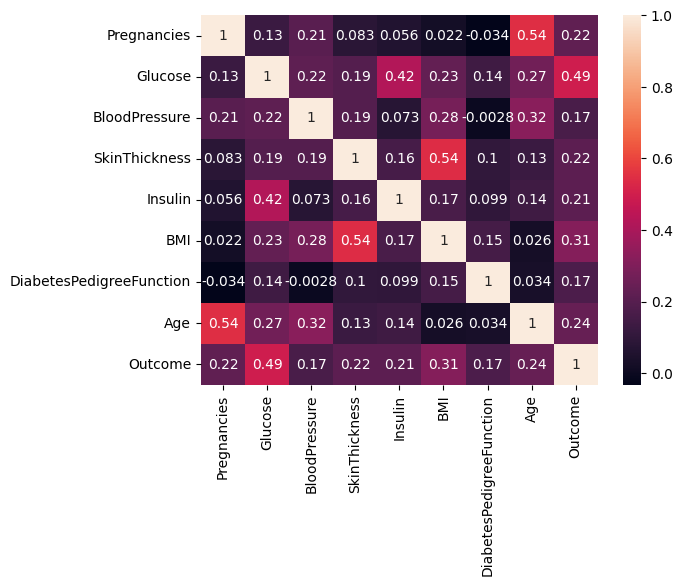

In [30]:
# import thư viện seaborn (lưu ý cần pip install seaborn)
import seaborn as sns

# Vẽ biểu đồ heatmap, truyền vào giá trị tương quan của df thông qua hàm corr()
# annot=True để hiển thị giá trị tương quan trong từng ô, nếu để False sẽ không hiển thị số trong ô
sns.heatmap(df.corr(),annot=True)

##### Lấy ra 3 giá trị có độ tương quan cao nhất đối với Outcome (trừ chính nó)
Ba thuộc tính này sẽ là ba thuộc tính có sự ảnh hưởng lớn nhất đối với kết quả, và chúng sẽ được dùng để huấn luyện mô hình.

In [31]:
# Tính top 4 cột có tương quan cao nhất với cột Outcome nhờ hàm nlargest(số giá trị, 'tên cột')
# Lấy 4 giá trị vì giá trị tương quan của cột với chính nó luôn là 1
top_4 = df.corr().nlargest(4, 'Outcome')

# In ra top 4 cột theo tên cột (index) và giá trị tương quan (values)
print(top_4.index)
print(top_4.values[:,8])

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')
[1.         0.49292767 0.31192439 0.23835598]


Kết luận: Ba thuộc tính có ảnh hưởng nhất đến Outcome (kết quả) là: lượng Glucose trong máu, chỉ số cơ thể BMI và tuổi tác. Ba thuộc tính này sẽ được sử dụng để huấn luyện mô hình học máy.

### 2.4 Đánh giá các thuật toán học máy
#### 2.4.1 Mục đích
Trước khi chúng ta huấn luyện mô hình học máy, sẽ tốt hơn nếu chúng ta tính toán hiệu suất của một vài thuật toán. Việc này giúp chúng ta lựa chọn ra thuật toán đem lại kết quả và hiệu suất tốt nhất cho mô hình của mình.
#### 2.4.2 Các thuật toán
+ Logistic Regression: thuật toán hồi quy logic.
+ K-Nearest Neighbors: K hàng xóm gần nhất.
+ Support Vector Machines (SVM) - Linear and RBF Kernels: máy vector hỗ trợ - nhân tuyến tính và RBF

##### a) Thuật toán hồi quy logistic
Hồi quy là một phương pháp thống kê để tìm mối quan hệ giữa một biến phụ thuộc vào một hay nhiều biến độc lập khác, nhằm dự đoán hoặc giải thích dữ liệu.


Hồi quy logistic: là hồi quy sử dụng hàm logistic (hay sigmoid) để dự đoán xác suất mẫu thuộc vào một giá trị cụ thể (ví dụ dự đoán xác suất để Outcome = 1) dựa trên các đặc trưng đầu vào theo công thức:
$$ P(Y=1) = \frac{1}{1 + e^{-(b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n)}} $$
Giải thích công thức: <br>
+ $ P(Y=1) $ là xác suất để kết quả là 1.
+ $b_0$ là hệ số chặn, $b_1, b_2, ..., b_n $ là hệ số đặc trưng cho từng đặc tính ảnh hưởng đến kết quả của Y. Các giá trị $b_i$ sẽ được máy tự động tính toán sao cho phù hợp với bộ dữ liệu nhất.
+ $x_1, x_2, ..., x_n $ là giá trị tương quan của các đặc trưng so với Y.


Kết quả:
+ Nếu $ P(Y=1) >= 0.5 $ thì dự đoán Y = 1.
+ NẾu $ P(Y=1) < 0.5 $ thì dự đoán Y = 0. 

##### Tại sao có công thức ở trên?
Để tìm hiểu công thức ở trên, chúng ta sẽ đi tìm hiểu từ tỉ lệ cược (Odds), hàm Logit rồi đến hàm Sigmoid.
+ Tỉ lệ cược: định nghĩa theo công thức: $$ Odds = \frac{P}{1-P} $$
với: $P$ là xác suất xảy ra, còn $1-P$ là xác suất không xảy ra
+ Hàm Logit: khi lấy log tự nhiên (với cơ số e), hay còn gọi là ln của Odds, ta được hàm Logit như sau:
$$ Logit(P) = \ln \left( \frac{P}{1 - P} \right) $$
Hàm Logit đã chuyển xác suất P thành một giá trị liên tục nằm trong khoảng $ (-\infty, +\infty) $ với đồ thị như sau: 
<br> <br>
![Ảnh đồ thị hàm Logit](https://i.imgur.com/97S3btg.png)
<br> <br>
Đồ thị hàm Logit có trục x là xác suất từ 0-1 và trục y là giá trị hàm Logit, nhưng điều chúng ta muốn đó là từ một hàm để giá trị số thực sang xác suất 0-1, và khi lật ngược trục của đồ thị hàm Logit thì ta sẽ có được điều này
<br><br>
![Đồ thị Sigmoid](https://i.imgur.com/5BzuWhY.png)
<Br> <br>
Sau khi biến đổi công thức hàm Logit có công thức tính xác suất như sau:
$$ P = \frac{1}{1 + e^{-(L)}} $$
với $L$ chính là giá trị hàm Logit.

##### Cách biến đổi: 
+ Bắt đầu với công thức logit:
$$ L = \ln\left(\frac{P}{1 - P}\right) $$
+ Mũ hóa hai vế:
$$ e^L = \frac{P}{1 - P} $$
+ Nhân chéo:
$$ P + P e^L = e^L $$
+ Rút $P$ ra chung:
$$ P (1 + e^L) = e^L $$
+ Chia cả hai vế cho $( 1 + e^L )$:
$$ P = \frac{e^L}{1 + e^L} $$
+ Nhân cả tử và mẫu với $ (e^{-L} )$ để viết lại dạng chuẩn:
$$ P = \frac{1}{1 + e^{-L}} $$

Đồ thị hàm Sigmoid:
<br> <br>
![Đồ thị Sigmoid](https://i.imgur.com/iLlLbTZ.png)
<Br><br>
Với hồi quy logistic, hàm Logit là kết hợp tuyến tính của các đặc trưng từ $x_1$ đến $x_n$ theo công thức:
$$ L = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n $$
thay L vào công thức tính $P$ ở trên, ta sẽ được công thức hàm Sigmoid tính xác suất áp dụng cho hồi quy logistic: 
$$ P(Y=1) = \frac{1}{1 + e^{-(b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n)}} $$
$P(Y=1)$ với $P$ là một vì chúng đều đại diện cho xác suất xảy ra.


##### Áp dụng vào case study
Sử dụng kiểm định chéo 10 lần (chia dữ liệu thành 10 phần rồi huấn luyện và kiểm tra 10 lần, mỗi lần huấn luyện kiểm tra sẽ lấy 1 phần làm tập kiểm tra và 9 phần còn lại làm tập dữ liệu huấn luyện, sau đó lấy giá trị độ chính xác trung bình của 10 lần) thay vì chia dữ liệu thành tập huấn luyện và tập kiểm tra rồi thực hiện 1 lần.
<br><br>
Dùng kiểm định chéo 10 lần sẽ đảm bảo tất cả dữ liệu đều được tham gia huấn luyện và kiểm tra (giống với việc đi thi 10 lần với đề khác nhau rồi lấy trung bình), do đó sẽ cho kết quả chính xác hơn so với việc chia dữ liệu thành tập huấn luyện và tập kiểm tra rồi thực hiện 1 lần (giống như việc đi thi 1 lần, điểm cao hay thấp là do đề khó hay dễ hay do may mắn ôn trúng hay không).

In [32]:
# import thư viện và module (lưu ý cần pip install sklearn)
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

# tạo ma trận X chứa các cột Glucose, BMI, Age (là 3 cột có tương quan cao nhất với cột Outcome)
X = df[['Glucose','BMI','Age']]

# tạo vector y chứa cột Outcome
# hàm iloc[:,k] để lấy tất cả dòng của cột có chỉ số thứ k
y = df.iloc[:,8]

# tạo mô hình hồi quy logistic
log_regress = linear_model.LogisticRegression()

# hàm cross_val_score để tính điểm accuracy của mô hình
# truyền vào mô hình hồi quy, ma trận tập dữ liệu huấn luyện X, vector kết quả y
# cv=10 để chia dữ liệu thành 10 phần bằng nhau để kiểm tra chéo (10-fold cross validation)
# scoring='accuracy' để tính điểm theo độ chính xác
# hàm mean() để lấy giá trị trung bình của 10 lần
log_regress_score = cross_val_score(log_regress, X, y, cv=10, scoring='accuracy').mean()

# in ra độ chính xác 
print(log_regress_score)

0.7669856459330144


Độ chính xác khi dùng hồi quy logistic thu được là 0.7669856459330144, lưu nó vào 1 mảng chứa kết quả để phục vụ việc so sánh độ chính xác với các thuật toán ở sau.

In [33]:
result = []
result.append(log_regress_score)

##### b) Thuật toán K hàng xóm gần nhất (KNN - K Nearset Neighbors)
Đây là một thuật toán dự đoán kết quả của mẫu mới dựa vào cách nhìn vào nhãn của K mẫu hàng xóm gần nhất trong tập huấn luyện (giống như việc đoán một người có học giỏi hay không, có thể nhìn vào 5 người bạn xung quanh họ (K = 5), nếu có 4/5 người học giỏi thì chúng ta đoán người đó cũng học giỏi).
<br> <br>
Cách thực hiện: 
+ Bước 1: dựa trên tập đầu vào X (ma trận lưu sự phụ thuộc của từng thuộc tính vào kết quả), tính toán khoảng cách Euclid từ điểm muốn tính kết quả đến tất cả các điểm còn lại theo công thức:

$$ d(A, B) = \sqrt{\sum_{i=1}^{n} (x_i - x'_i)^2} $$

Giải thích công thức:
- $d(A, B)$ là khoảng cách Euclid giữa 2 mẫu.
- $x_i, x'_i$ lần lượt là giá trị tương quan so với kết quả của từng thuộc tính trong từng mẫu A và B.

+ Bước 2: Chọn K để dự đoán
    - Với mỗi giá trị K, chọn ra K mẫu có khoảng cách Euclid ngắn nhất so với mẫu cần dự đoán rồi kiềm tra kết quả của K mẫu đó. Kết quả nào chiếm ưu thế về số lượng thì sẽ được gán cho kết quả của mẫu cần dự đoán (ví dụ K = 3 cho ra 2 mẫu có Outcome là 1 và 1 mẫu có Outcome là 0 thì mẫu cần dự đoán sẽ được gán cho Outcome là 1 vì nó chiếm ưu thế hơn).
    - Chọn K là số lẻ bởi vì nếu K là số chẵn có khả năng kết quả không có cái nào chiếm ưu thế (ví dụ khi K = 2 cho ra kết quả mẫu 1 là Outcome = 0, mẫu 2 là Outcome = 1 thì không ra được kết quả mong muốn).
    - Cách chọn K tối ưu: không chọn K quá nhỏ hay quá lớn mà cần lặp qua các giả trị lẻ của K, với mỗi giá trị tìm ra độ chính xác trung bình, với giá trị K có độ chính xác trung bình cao nhất sẽ là giá trị K tối ưu.




##### Áp dụng vào case study
+ Tiếp tục sử dụng kiểm định chéo 10 lần với nhiều giá trị K để tìm ra K tối ưu.
+ Tìm khoảng của K: do dữ liệu chia làm 10 phần, 9 phần làm tập huấn luyện, 1 phần làm tập kiểm tra nên K sẽ thuộc khoảng số lẻ từ 1 đến số bộ dữ liệu tương ứng với 9 phần tính theo công thức:
$$
\text{Số bộ dữ liệu} \times \frac{\text{Số dữ liệu huấn luyện}}{\text{Số bộ dữ liệu}} = \text{Số bộ dữ liệu} \times \frac{9}{10}
$$

In [34]:
# import thư viện và module 
from sklearn.neighbors import KNeighborsClassifier

# mảng lưu giá trị điểm ưng với từng K
cv_scores = []

# số lần kiểm định chéo 
folds = 10

# tạo mảng chứa các giá trị của k theo công thức ở trên, bước nhảy = 2 để lấy K lẻ
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))

# duyệt qua từng giá trị của k
for k in ks:
    # tạo mô hình KNN với số hàng xóm k
    knn = KNeighborsClassifier(n_neighbors=k)

    # tính điểm trung bình theo độ chính xác của mô hình
    # các tham số giải thích giống như ở thuật toán hồi quy logistic
    score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()

    # lưu điểm vào mảng để tìm giá trị điểm tốt nhất về sau
    cv_scores.append(score)

# tìm giá trị độ chính xác tốt nhất và giá trị k tối ưu
knn_score = max(cv_scores)
optimal_k = ks[cv_scores.index(knn_score)]

# in ra kết quả
print(f"Giá trị K tối ưu là {optimal_k}")
print(knn_score)

# đưa kết quả vào mảng để so sánh các thuật toán
result.append(knn_score)

Giá trị K tối ưu là 19
0.7721462747778537


Kết luận: Độ chính xác lớn nhất của thuật toán KNN là 0.7721462747778537 tại giá trị K tối ưu là 19.

##### c) Thuật toán máy vector hỗ trợ (SVM)
Ý tưởng chính của thuật toán này là vẽ một đường thẳng hoặc siêu phẳng giữa 2 hoặc nhiều lớp sao cho tối ưu nhất có thể
<br> <br>
Ví dụ: Để phân loại động vật là chó hay mèo thông qua độ dài mõm và hình khối tai của một động vật mới chưa xác định, có thể dùng một đường phân chia vẽ để tách biệt các lớp dựa trên 2 thuộc tính trên, từ đó có thể đoán được dữ liệu trong tương lai.
<br> <br>
![Ví dụ SVM](https://i.imgur.com/5FRhsI4.png)

##### Áp dụng vào case study
+ Dùng nhân tuyến tính (linear), vẫn dùng kỹ thuật kiểm định chéo 10 lần.


In [35]:
# import thư viện và module
from sklearn import svm

# tạo mô hình SVM với nhân tuyến tính
linear_svm = svm.SVC(kernel='linear')

# tính điểm trung bình theo độ chính xác trung bình
linear_svm_score = cross_val_score(linear_svm, X, y, cv=10, scoring='accuracy').mean()

# in ra kết quả
print(linear_svm_score)

# đưa kết quả vào mảng để so sánh các thuật toán
result.append(linear_svm_score)

0.7656527682843473


Kết quả thu được độ chính xác của thuật toán SVM với nhân tuyến tính là 0.7656527682843473.
+ Dùng nhân RBF, vẫn dùng kiểm định chéo 10 lần.

In [36]:
# tạo mô hình SVM với nhân RBF
rbf = svm.SVC(kernel='rbf')

# tính điểm trung bình theo độ chính xác trung bình
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()

# in ra kết quả
print(rbf_score)

# đưa kết quả vào mảng để so sánh các thuật toán
result.append(rbf_score)

0.765704032809296


Kết quả thu được độ chính xác của thuật toán SVM với nhân RBF là 0.765704032809296.
#### 2.4.2 Lựa chọn ra thuật toán tốt nhất

In [37]:
# mảng chứa tên danh sách các thuật toán
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel"]

# tạo một DataFrame từ mảng kết quả, index = algorithms gán tên cho từng dòng
# mảng algorithms chứa tên các thuật toán có vị trí ứng với kết quả trong mảng result
cv_mean = pd.DataFrame(result,index = algorithms)

# đặt tên cột cho DataFrame là Accuracy (độ chính xác), giúp dễ nhìn hơn khi in ra
cv_mean.columns=["Accuracy"]

# sắp xếp giảm dần (ascending = False) theo độ chính xác (Accuracy)
cv_mean.sort_values(by="Accuracy",ascending=False)

Accuracy
K Nearest Neighbors  0.772146
Logistic Regression  0.766986
SVM RBF Kernel       0.765704
SVM Linear Kernel    0.765653

Dựa trên kết quả thu được, ta thấy thuật toán KNN với K = 19 cho kết quả với độ chính xác cao nhất, do đó chọn thuật toán này cho mô hình học máy với bộ dữ liệu đã cho.

### 2.5 Huấn luyện và lưu lại mô hình

+ Huấn luyện mô hình
<br> <br>
Huấn luyện mô hình theo thuật toán KNN với K = 19 thông qua phương thức fit của sklearn, truyền vào tập dữ liệu huấn luyện X và kết quả đầu ra y để mô hình có thể học

In [38]:
# tạo mô hình KNN với số hàng xóm tối ưu
knn = KNeighborsClassifier(n_neighbors=19)

# huấn luyện mô hình với dữ liệu X, y
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=19)

+ Lưu mô hình
<br> <br>
Sau khi mô hình đã được huấn luyện, cần lưu vào đĩa để tái sử dụng, tránh việc phải huấn luyện lại mỗi lần cần dự đoán.


In [39]:
# import thư viện
import pickle

# lưu mô hình vào file diabetes.sav
filename = 'diabetes.sav'

# mở file diabetes.sav ở chế độ ghi và chế độ nhị phân sau đó ghi mô hình knn vào file
pickle.dump(knn, open(filename, 'wb'))

Lúc này, mô hình đã được lưu vào file có tên diabetes.sav. Chúng ta có thể tải để kiểm tra xem nó đã được lưu hay chưa.

In [40]:
# load mô hình từ file diabetes.sav
loaded_model = pickle.load(open(filename, 'rb'))

Bây giờ, có thể thử nghiệm làm một vài dự đoán để xem kết quả.

In [41]:
# khởi tạo giá trị Glucose, BMI, Age
Glucose = 65
BMI = 70
Age = 50

# dự đoán kết quả từ mô hình, kết quả là mảng chứa outcome, số phần tử phụ thuộc vào số bộ giá trị
prediction = loaded_model.predict([[Glucose, BMI, Age]])

# in ra mảng kết quả (ở đây chỉ có 1 kết quả)
print(prediction)

# vì có 1 kết quả nên in ra phần tử đầu tiên của mảng kết quả
# nếu prediction[0] == 0 thì in ra Không bị tiểu đường, ngược lại in ra Bị tiểu đường
if (prediction[0]==0):
 print("Không bị tiểu đường")
else:
 print("Bị tiểu đường")

[0]
Không bị tiểu đường


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Kết quả nhận được là không bị tiểu đường (kết quả Outcome là 0) (phần thông báo là do khi dự đoán, dữ liệu truyền vào là mảng số chứ không phải DataFrame như khi huấn luyện, không gây ảnh hưởng kết quả).

Để xem xác suất của dự đoán như nào, lấy xác suất và chuyển thành phần trăm.

In [43]:
# dự đoán xác suất từ mô hình
# kết quả là mảng 2 chiều, mỗi phần tử là mảng chứa xác suất của outcome 1 và 0
proba = loaded_model.predict_proba([[Glucose, BMI, Age]])

# in ra mảng xác suất
print(proba)

# in ra xác suất của outcome 1 theo %
# proba[0] là mảng chứa xác suất outcome của giá trị truyền vào
# hàm np.amax(proba[0]) để lấy giá trị lớn nhất trong mảng xác suất
# làm tròn đến 2 số sau dâu phẩy
print("Độ chính xác: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%")

[[0.94736842 0.05263158]]
Độ chính xác: 94.74%


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Giải thích kết quả:
+ Dự đoán outcome là 0 (không bị tiểu đường).
+ Độ chính xác (tin cậy) là 94,74%.
<br>
$=>$ Độ tin cậy càng cao thì kết quả càng chính xác, nếu độ tin cậy càng gần 50% thì càng khó khẳng định kết quả.

### 2.6 Kiểm thử mô hình
Tạo 1 file REST_API.py ở ngoài (xem file đính kèm), vào Terminal chạy file REST_API.py bằng cách mở cmd, truy cập đến thư mục chứa file REST_API.py rồi gõ dòng lệnh "python REST_API.py", sau đó mở 1 cửa số Terminal khác rồi dán lệnh curl sau đây để dự đoán:
curl -H "Content-type: application/json" -X POST http://127.0.0.1:5000/diabetes/v1/predict -d "{\"BMI\":30, \"Age\":29, \"Glucose\":100}"
##### Giải thích:
+ curl: gọi lệnh curl
+ -H "Content-type: application/json": thiết lập dữ liệu gửi đi là json
+ -X POST: dùng phương thức POST
+ http://127.0.0.1:5000/diabetes/v1/predict: địa chỉ API trên localhost, cổng 5000
+ -d "{\"BMI\":30, \"Age\":29, \"Glucose\":100}": dữ liệu json gửi đi

##### Hình ảnh minh họa
+ Tạo file REST_API.py (code)
<br><br>
![code API](https://i.imgur.com/uWUFZYJ.png)
<br> <br>
+ Chạy file REST_API.py
<br><br>
![Chạy REST_APT](https://i.imgur.com/0eUDwQ3.png)
<br><br>
+ Chạy lệnh curl và thu kết quả
<br><br>
![curl](https://i.imgur.com/DjVGCNi.png)
##### Kết quả thu được: độ chính xác: 78.95%, dự đoán: 0 (không bị tiểu đường)
### 2.7 Tạo ứng dụng phía client để sử dụng mô hình
+ Chạy thử trong Python Notebook

In [ ]:
# import thư viện
import json
import requests

# hàm dự đoán tiểu đường từ API
def predict_diabetes(BMI, Age, Glucose):
   # url của API
   url = 'http://127.0.0.1:5000/diabetes/v1/predict'

   # dữ liệu truyền vào API
   data = {"BMI":BMI, "Age":Age, "Glucose":Glucose}
   
   # chuyển dữ liệu thành json
   data_json = json.dumps(data)
   
   # định dạng header của request với dạng dữ liệu json
   headers = {'Content-type':'application/json'}

   # gửi request POST đến API
   response = requests.post(url, data=data_json, headers=headers)

   # chuyển kết quả trả về thành json
   result = json.loads(response.text)
   return result

# test hàm dự đoán
if __name__ == "__main__":
   # gọi hàm dự đoán với các giá trị BMI, Age, Glucose
   predictions = predict_diabetes(30,40,100)
   # in ra kết quả dự đoán
   print("Diabetic" if predictions["prediction"] == 1 else "Not Diabetic")
   print("Confidence: " + predictions["confidence"] + "%")

Not Diabetic
Confidence: 68.42%


Chạy thử thành công. Bây giờ chỉ cần tạo 1 ứng dụng với code y hệt, nhưng thay vì truyền sẵn các thông số thì giao diện sẽ yêu cầu nhập vào 3 thông số đó. Đặt tên file là Predict_Diabetes.py và chạy (luôn chạy REST_API.py song song ở 1 Terminal khác)
<br><br>
![code app](https://i.imgur.com/zTLzObr.png)
<br><br>
Kết quả chạy chương trình:
<br><br>
![kết quả](https://i.imgur.com/ZF3xLXE.png)